# Product Mix

## Decision variables

$D$ = Unit of Diesel 

$P$ = Unit of Petrol



## Parameters
Profit units for Petrol = RM 20 

Profit units for Diesel = RM 50

Supply for raw material = 240 kg

Usage rate for petrol = 2 per kg

usage rate for diesel = 4 per kg

## Constraints

sales volume for Petrol is at least 80% of the total sales of both Petrol and Diesel

### 
$80\% \leq \frac{P}{P+D}$

### 
$P\leq 100$

### 
$2P+4D \leq 240$

## Objective

 Maximize profit
 
 $20 P + 50 D$


# Model

In [30]:
import pulp

from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

model = LpProblem(name="product-mix-problem", sense=LpMaximize)
x = LpVariable(name="d", lowBound=0)
y = LpVariable(name="p", lowBound=0)

obj_func = 20 * x + 50 * y
model += obj_func

model += (-0.2 * x + 0.8 * y <= 0, "1_constraint")
model += (x  <= 100, "2_constraint")
model += (2 * x + 4*y  <= 240, "3_constraint")

In [31]:
model

product-mix-problem:
MAXIMIZE
20*d + 50*p + 0
SUBJECT TO
1_constraint: - 0.2 d + 0.8 p <= 0

2_constraint: d <= 100

3_constraint: 2 d + 4 p <= 240

VARIABLES
d Continuous
p Continuous

In [32]:
status = model.solve()


In [28]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [33]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

d: 80.0
p: 20.0


In [34]:
model.objective.value()

2600.0

# Graphical 

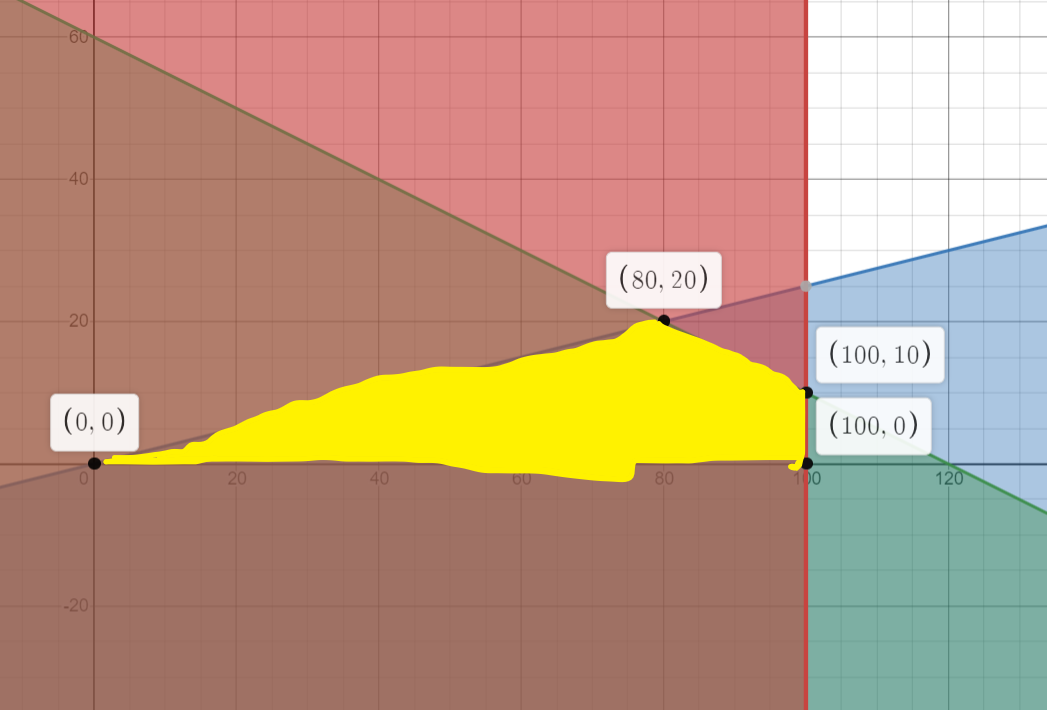

In [18]:
from IPython.display import Image
Image(filename='image2.png') 